In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [2]:
df = pd.read_csv('../dataset/data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


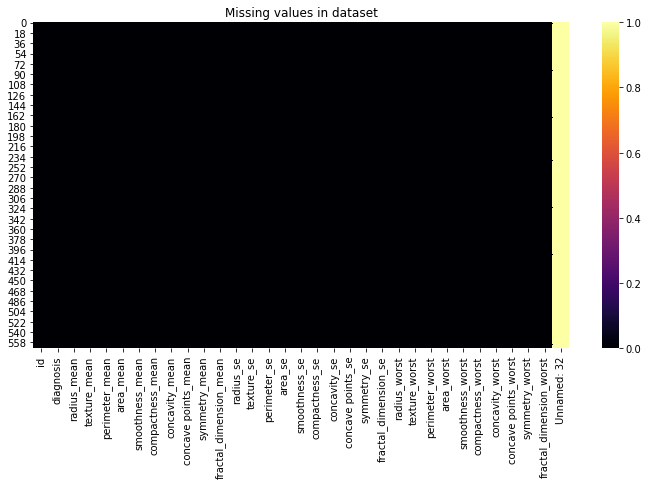

In [3]:
plt.figure(figsize=(12, 6))
plt.title('Missing values in dataset')
sns.heatmap(df.isna(), cmap='inferno')

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df = df.drop(['id'],axis=1)
df = df.drop(['Unnamed: 32'],axis=1)

df = df.rename(columns={"concave points_mean": "concave_points_mean", 
                   "concave points_se": "concave_points_se", 
                   "concave points_worst": "concave_points_worst"})
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
df['diagnosis']=pd.factorize(df['diagnosis'])[0]
sta = df.describe()
sta.iloc[:, :8]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800


In [52]:
sta.iloc[:, 8:16]

,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041
std,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003
min,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713
25%,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169
50%,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380
75%,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146
max,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130


In [54]:
sta.iloc[:, 16:24]

,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213
std,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542
min,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000
25%,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000
50%,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000
75%,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000
max,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000


In [55]:
sta.iloc[:, 24:]

,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


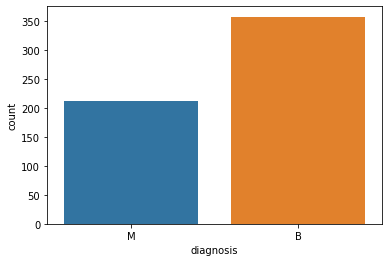

In [6]:
sns.countplot(x='diagnosis',data=df)

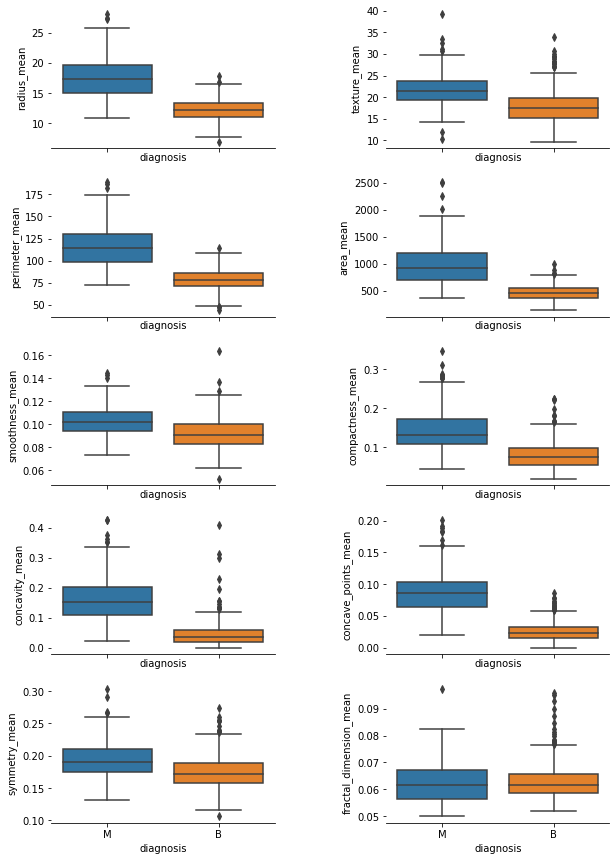

In [7]:
f, axes = plt.subplots(5, 2, figsize=(10, 15), sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2)

sns.despine(left=True)

sns.boxplot(x="diagnosis", y="radius_mean", data=df, ax=axes[0, 0])
sns.boxplot(x="diagnosis", y="texture_mean", data=df, ax=axes[0, 1])
sns.boxplot(x="diagnosis", y="perimeter_mean", data=df, ax=axes[1, 0])
sns.boxplot(x="diagnosis", y="area_mean", data=df, ax=axes[1, 1])
sns.boxplot(x="diagnosis", y="smoothness_mean", data=df, ax=axes[2, 0])
sns.boxplot(x="diagnosis", y="compactness_mean", data=df, ax=axes[2, 1])
sns.boxplot(x="diagnosis", y="concavity_mean", data=df, ax=axes[3, 0])
sns.boxplot(x="diagnosis", y="concave_points_mean", data=df, ax=axes[3, 1])
sns.boxplot(x="diagnosis", y="symmetry_mean", data=df, ax=axes[4, 0])
sns.boxplot(x="diagnosis", y="fractal_dimension_mean", data=df, ax=axes[4, 1])

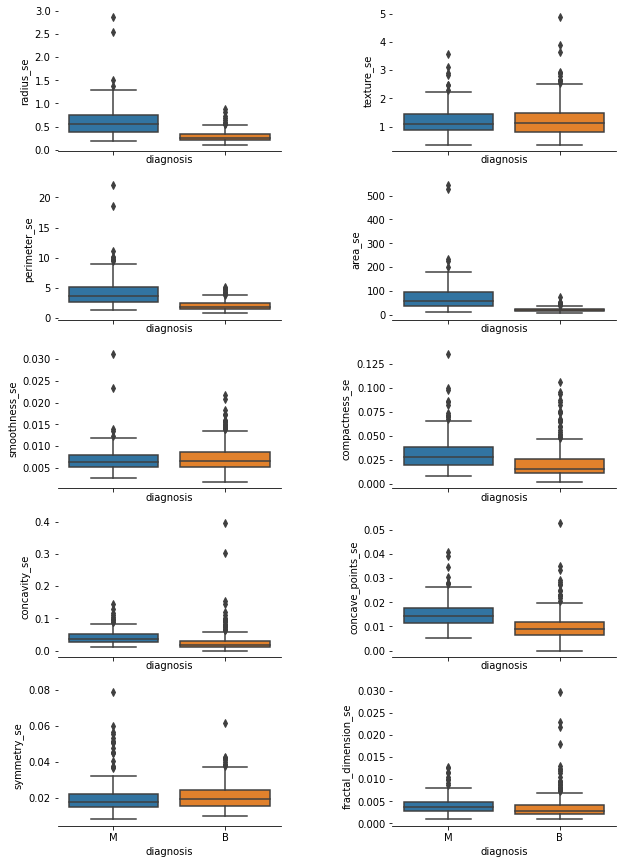

In [8]:
f, axes = plt.subplots(5, 2, figsize=(10, 15), sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2)

sns.despine(left=True)

sns.boxplot(x="diagnosis", y="radius_se", data=df, ax=axes[0, 0])
sns.boxplot(x="diagnosis", y="texture_se", data=df, ax=axes[0, 1])
sns.boxplot(x="diagnosis", y="perimeter_se", data=df, ax=axes[1, 0])
sns.boxplot(x="diagnosis", y="area_se", data=df, ax=axes[1, 1])
sns.boxplot(x="diagnosis", y="smoothness_se", data=df, ax=axes[2, 0])
sns.boxplot(x="diagnosis", y="compactness_se", data=df, ax=axes[2, 1])
sns.boxplot(x="diagnosis", y="concavity_se", data=df, ax=axes[3, 0])
sns.boxplot(x="diagnosis", y="concave_points_se", data=df, ax=axes[3, 1])
sns.boxplot(x="diagnosis", y="symmetry_se", data=df, ax=axes[4, 0])
sns.boxplot(x="diagnosis", y="fractal_dimension_se", data=df, ax=axes[4, 1])

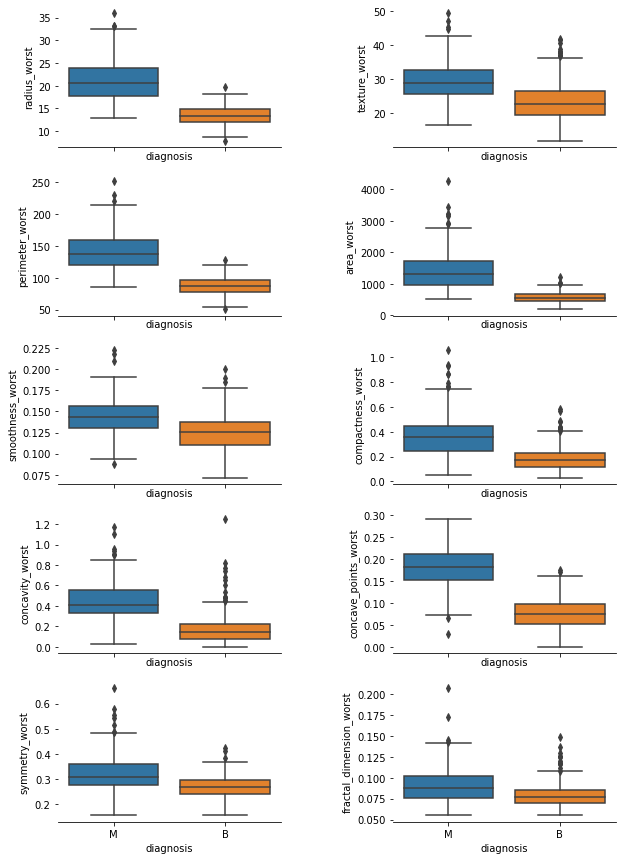

In [9]:
f, axes = plt.subplots(5, 2, figsize=(10, 15), sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2)

sns.despine(left=True)

sns.boxplot(x="diagnosis", y="radius_worst", data=df, ax=axes[0, 0])
sns.boxplot(x="diagnosis", y="texture_worst", data=df, ax=axes[0, 1])
sns.boxplot(x="diagnosis", y="perimeter_worst", data=df, ax=axes[1, 0])
sns.boxplot(x="diagnosis", y="area_worst", data=df, ax=axes[1, 1])
sns.boxplot(x="diagnosis", y="smoothness_worst", data=df, ax=axes[2, 0])
sns.boxplot(x="diagnosis", y="compactness_worst", data=df, ax=axes[2, 1])
sns.boxplot(x="diagnosis", y="concavity_worst", data=df, ax=axes[3, 0])
sns.boxplot(x="diagnosis", y="concave_points_worst", data=df, ax=axes[3, 1])
sns.boxplot(x="diagnosis", y="symmetry_worst", data=df, ax=axes[4, 0])
sns.boxplot(x="diagnosis", y="fractal_dimension_worst", data=df, ax=axes[4, 1])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

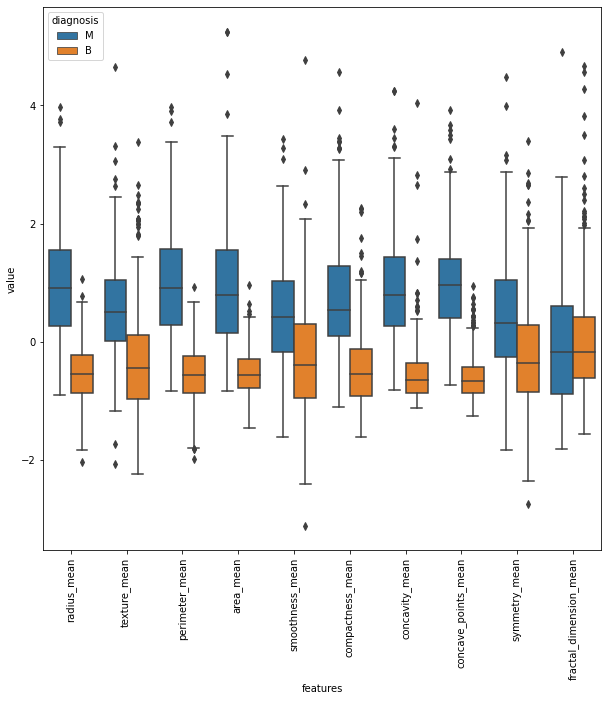

In [28]:
data = df
y = data.diagnosis                          # M or B 
x = (data.drop(['diagnosis'],axis=1))

data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())    # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

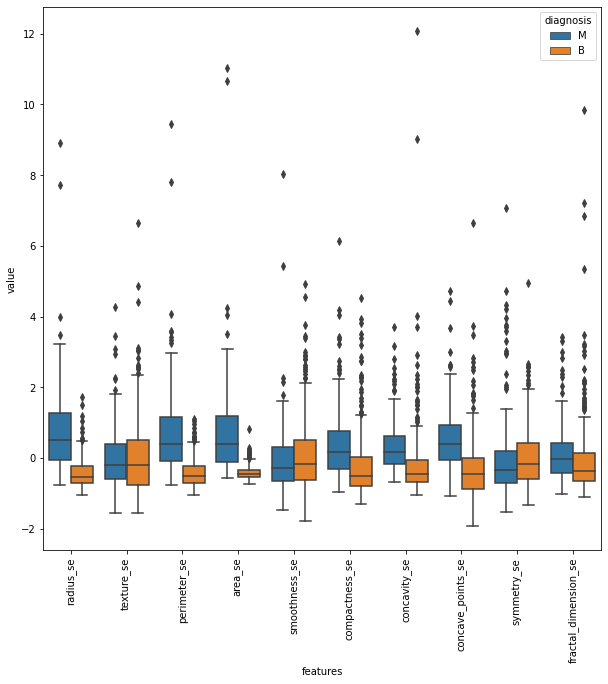

In [27]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

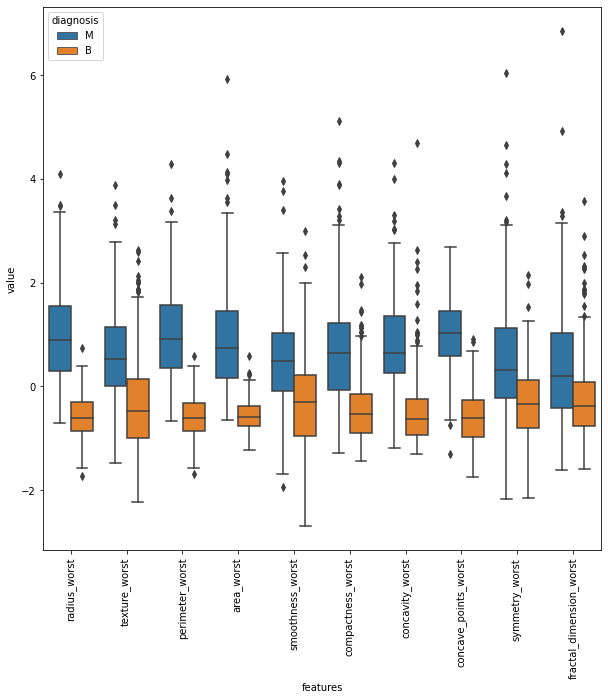

In [26]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

In [49]:
# M = 0
# B = 1
df['diagnosis']=pd.factorize(df['diagnosis'])[0]

In [53]:
coorelation = df.corr()
coorelation

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


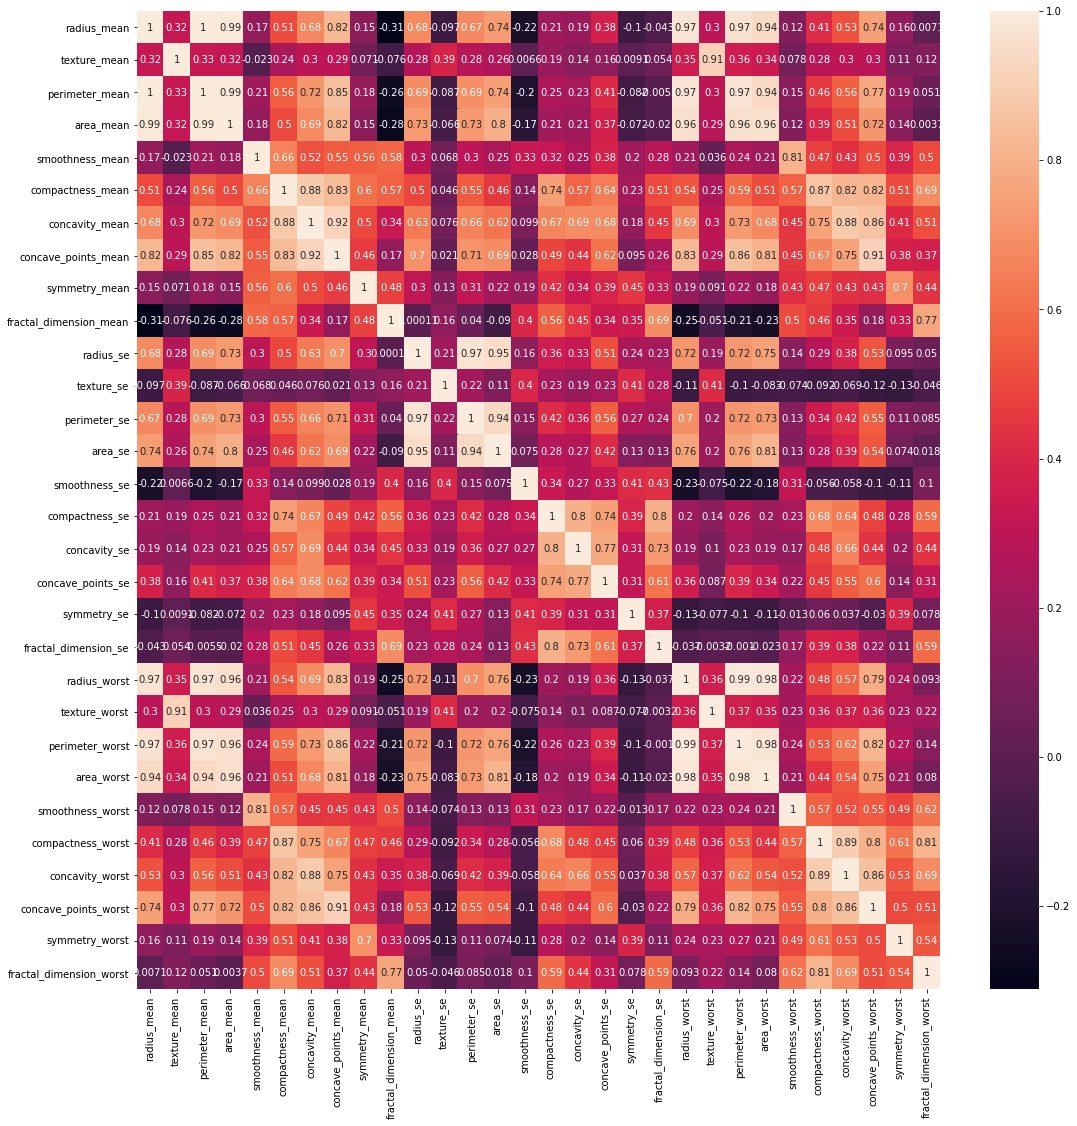

In [32]:
f, axes = plt.subplots(figsize=(18, 18), sharex=True)

sns.despine(left=True)
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)